# Introduction
This is a jupyter notebook which contains code for the artificial intelligence course for leaders. A Jupyter notebook is a series of cells which can be executed such that the code in them is run. In this course we will explore a data set by plotting with matplotlib. Predictive supervised models will be built, first regression models, then an artificial neural network. We will be following the machine learning pipeline outlined in the theory part of the course. 

Run the Following cell if the notebook is opened in Google Collab. It will clone the github repository to get all necessary files. To run a cell, mark it and press the "Run" button in the menu.

In [ ]:
!git clone https://github.com/NordAxon/AI-For-Leaders.git
cd AI-For-Leaders

# Import Libraries
Import all the libraries we need to run the code and perform the analysis. 

In [72]:
import numpy as np
import pandas as pd
import matplotlib as plt
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras
%load_ext autoreload
%autoreload 2
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1) Import Raw Data
Data source: https://www.kaggle.com/anthonypino/melbourne-housing-market

In [133]:
housing_df_original = pd.read_csv('data/melbourne-housing-market/Melbourne_housing_FULL.csv')
print(housing_df['Suburb'].nunique())
print(housing_df['CouncilArea'].nunique())
print(housing_df['Regionname'].nunique())
housing_df_original

351
33
8


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,4.0,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,3.0,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0


In [134]:
housing_df.shape

(34857, 21)

# 2) Pre-Processing
We will have a look at the data set to see what has to be done in order for it to be formated in a way which is readable for the machine learning algorithms. 

## Fill Empty Data
In some of the columns in the data we can see some entries are NaN, that means Not a Number. This is missing data. Many machine learning algorithms need some data in all rows and columns so the NaNs have to be filled with something meaningful. That might be different for different columns. For example "Landsize" will be filled with 0 since a NaN it that case can be assumed to mean that there is no land contained in the real estate sale. Let's first have a look at how many NaN values are present in each column.

In [316]:
print('Number of NaNs')
print(pd.isnull(housing_df_original).sum())

housing_df = housing_df_original.copy()

housing_df['Price'].fillna(0.0, inplace=True)
housing_df['BuildingArea'].fillna(0.0, inplace=True)
housing_df['Rooms'].fillna(0.0, inplace=True)
housing_df['Landsize'].fillna(0.0, inplace=True)
housing_df['Car'].fillna(0.0, inplace=True)
housing_df['Bathroom'].fillna(0.0, inplace=True)
housing_df['Bedroom2'].fillna(0.0, inplace=True)

housing_df['YearBuilt'].fillna(housing_df_feature['YearBuilt'].mean(), inplace=True)
housing_df['YearBuilt'] = housing_df['YearBuilt'].clip(0, 2018)

Number of NaNs
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


## Remove Outliers
Outliers are data point which are located far from the other data points, these come with a risk of skewing the models and therefore we want to remove these. Run the cell below to see a plot of price, here it is clear that we have some data points which are far away from the others. 

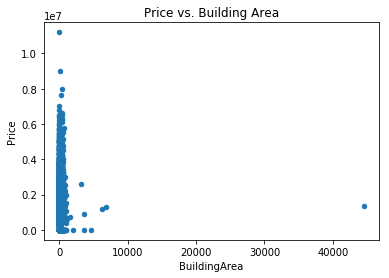

In [291]:
housing_df.plot.scatter('BuildingArea', 'Price', title='Price vs. Building Area')

### Assignment 1: Plot "Landsize" vs "Price" to see if there are any outliers
-  If so, what could be a resonable cut-off?
-  Clip the data set to remove "Landsize outliers", i.e replace np.inf with a resonable number

In [317]:
housing_df = housing_df[(housing_df['BuildingArea'] > 0) & (housing_small_df['BuildingArea'] < 500)]
housing_df = housing_df[(housing_df['Price'] > 0) & (housing_small_df['Price'] < 4000000)]
housing_df['Landsize'] = housing_df['Landsize'].clip(0, np.inf)

## Plot Variable Correlations

,Price,BuildingArea,Rooms,Landsize,Car,Bathroom
count,1.031200e+04,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000
mean,1.063200e+06,148.209797,3.093677,458.587471,1.672517,1.645656
std,6.019593e+05,69.604132,0.951420,1080.457327,0.979822,0.701027
min,1.310000e+05,30.600000,1.000000,0.000000,0.000000,1.000000
25%,6.370000e+05,101.000000,2.000000,115.000000,1.000000,1.000000
50%,8.900000e+05,133.000000,3.000000,383.000000,2.000000,2.000000
75%,1.320125e+06,180.000000,4.000000,626.250000,2.000000,2.000000
max,3.950000e+06,496.000000,12.000000,42800.000000,10.000000,9.000000


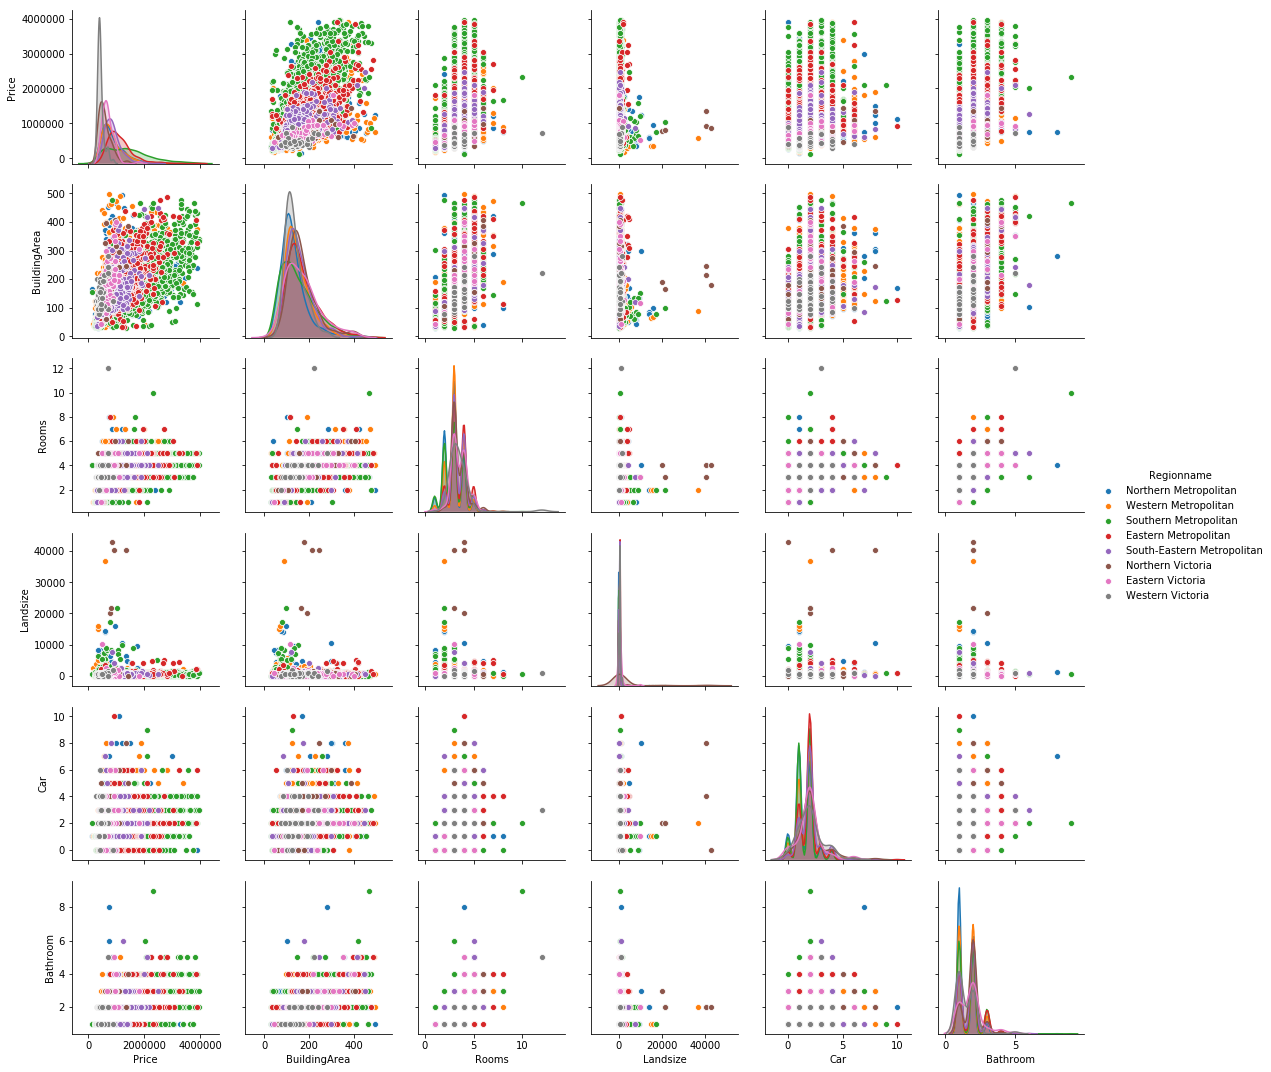

In [138]:
g = sns.pairplot(housing_df[['Price', 'BuildingArea', 'Rooms', 'Landsize', 'Car', 'Bathroom', 'Regionname']], hue="Regionname")
housing_df[['Price', 'BuildingArea', 'Rooms', 'Landsize', 'Car', 'Bathroom', 'Regionname']].describe()

## Plot Histograms of Different Variables

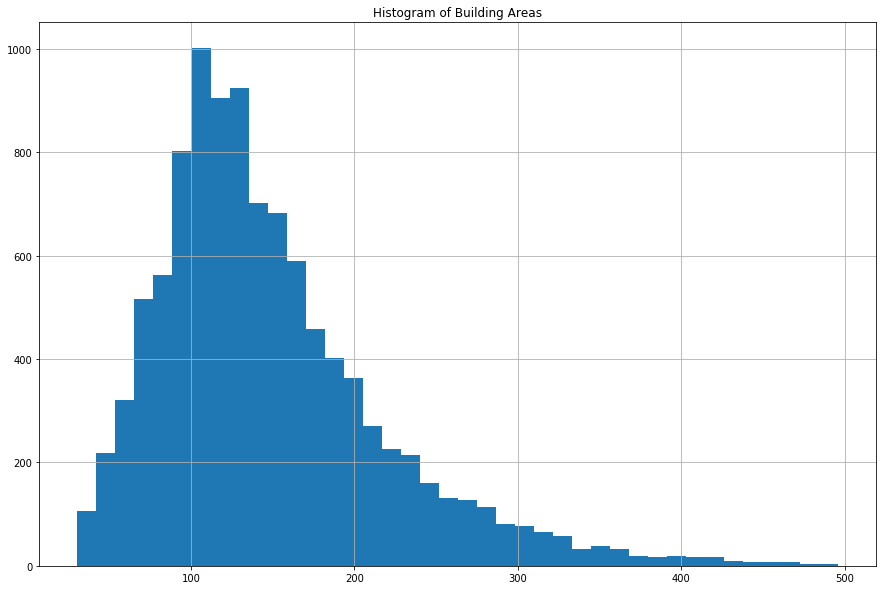

In [139]:
housing_df['BuildingArea'].hist(bins=40, figsize=(15,10))
plt.title('Histogram of Building Areas');

### Assignment 2: Create a histogram of Price in the following cell

# Price vs. Building Area

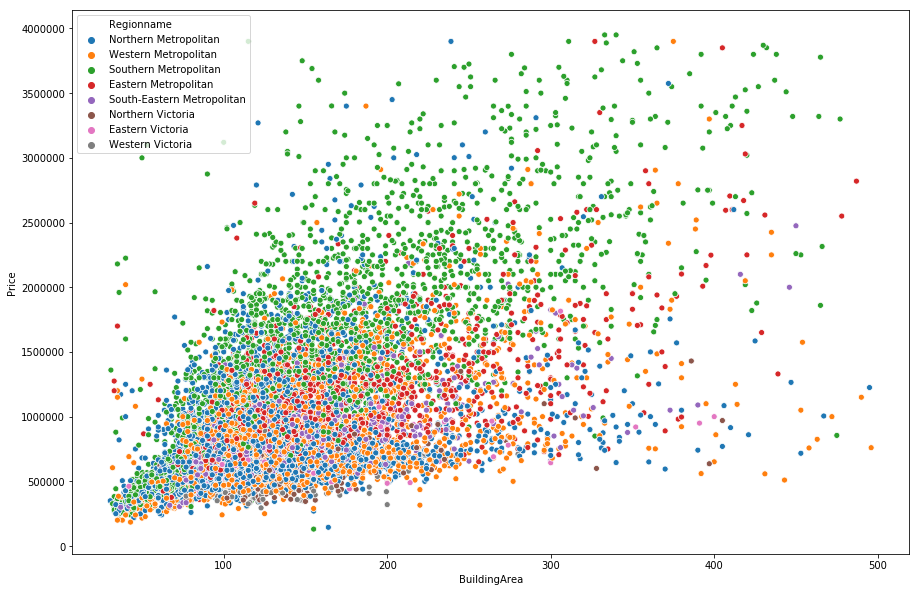

In [258]:
# See that the data is heteroscedastic, changing variance. 
#housing_df.plot.scatter('BuildingArea', 'Price', figsize=(15,10), title='Price vs. Building Area')
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="BuildingArea", y="Price", hue="Regionname", data=housing_df)
#housing_df[housing_df['CouncilArea'] == 'Yarra City Council'].plot.scatter('BuildingArea', 'Price', figsize=(15,10), title='Price vs. Building Area in One Area')

### Assignment 3: Plot Price vs. any variable you might find interesting

# 3) Feature Engineering
Let's look at the data to see what we can do with the data to create columns which are more easily readable to a machine learning algorithm and how we can provide more information from the data we have. 

In [318]:
# One-hot encoding of Region
one_hot_region = pd.get_dummies(housing_df.Regionname, prefix='Regionname')
#one_hot_Council = pd.get_dummies(housing_df.Regionname,prefix='CouncilArea')
housing_df_feature = pd.concat([housing_df, one_hot_region], axis=1)
one_hot_region

,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
6,0,0,1,0,0,0,0,0
11,0,0,1,0,0,0,0,0
14,0,0,1,0,0,0,0,0
18,0,0,1,0,0,0,0,0
24,0,0,1,0,0,0,0,0
25,0,0,1,0,0,0,0,0
30,0,0,1,0,0,0,0,0
32,0,0,1,0,0,0,0,0


### Assignment 4: Create a feature of house age based on "YearBuilt" 

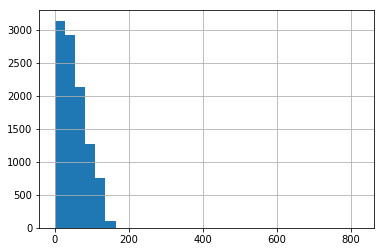

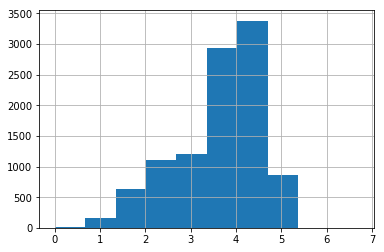

In [324]:
#(2018. - housing_df_feature['YearBuilt']).apply(lambda x: np.log(x))
house_ages = pd.Series(np.log((1 + (2018. - housing_df_feature['YearBuilt']))))
(2018. - housing_df_feature['YearBuilt']).hist(bins=30)
housing_df_feature['Age'] = house_ages
plt.figure()
house_ages.hist()

# Simple One Dimensional Linear Regression
# 4) Model Training

We'll start of by looking at a subset of the housing data, only in the council area of Yarra.
The goal is to find all of the weights, $w_i$, in the following linear regression model. 
$y = w_0 + w_1x_1$


[4921.17388801]


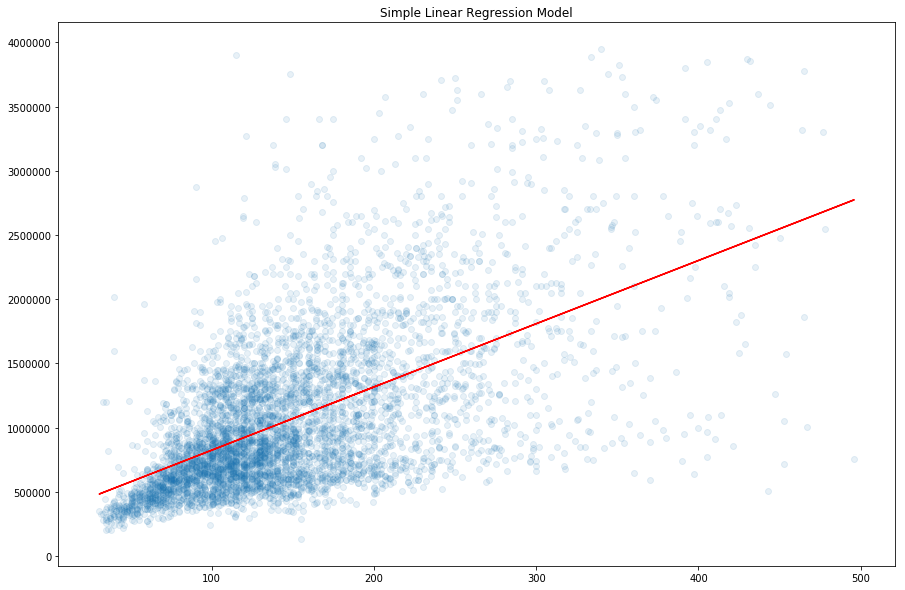

In [262]:
# Set up input and output variables
y = housing_df_feature['Price']
x = housing_df_feature[['BuildingArea']]

# Split into test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

# Set up regression model
regr = linear_model.LinearRegression()

# Train the regression model
regr.fit(x_train, y_train)

# Perform predictions
y_pred = regr.predict(x_test)

# Print regression coefficients, w
print(regr.coef_)

# Plot results
plt.figure(figsize=(15,10));
plt.plot(x_test, y_pred, 'r');
plt.scatter(x_test, y_test, alpha=0.1);
plt.title('Simple Linear Regression Model');

# 5) Model Evaluation

In [265]:
# Evaluate Results
mean_error = (y_pred - y_test).abs().mean()
mean_error_baseline = (y_train.mean() - y_test).abs().mean()
print('\nBaseline Mean Error: ' + str(mean_error_baseline))
print('Mean Error: ' + str(mean_error))


Baseline Mean Error: 457821.09729819855
Mean Error: 362508.11866894655


# Multi-Dimensional Linear Regression
# 4) Model Training
In order to increase the predictive power, i.e. to get a more accurate model, more information can be added to the model. One way of doing that is by adding more input variables to the model. Variables that could be tried are BuildingArea, Rooms, LandSize, Car. <br><br>
$y = w_0 + w_1x_1 + w_2x_2 + \dots$<br>

In [341]:
feature_list = ['BuildingArea', 'Rooms', 'Landsize', 'Car', 'Age'] + list(one_hot_region.columns)

In [339]:
x = housing_df_feature[feature_list]
y = housing_df_feature['Price']

# Split into test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

# Set up regression model
regr = linear_model.LinearRegression()

# Train the regression model
regr.fit(x_train, y_train)

# Perform predictions
y_pred = regr.predict(x_test)

# Print regression coefficients, w
print('Regression Coefficients, w0, w1, w2, ...')
print(regr.coef_)

Regression Coefficients, w0, w1, w2, ...
[ 3.73228515e+03  1.27530181e+05  1.04070586e+01 -1.85977684e+04
  1.75527404e+05 -2.32947458e+05  1.60790797e+05 -3.71579577e+05
 -5.96496859e+03  6.17355120e+05  3.30670002e+04 -3.76248317e+05]


# 5) Model Evaluation

In [340]:
# Evaluate Results
mean_error = (y_pred - y_test).abs().mean()
print('\nMean Error Multi-Dimensional Linear Regression: ' + str(mean_error))


Mean Error Multi-Dimensional Linear Regression: 317248.43195586366


### Assignment 5: Add the data column 'Car' to the input data and see if your results change.

# Neural Network
The code in the following cell transforms data, builds a neural network and evaluates results of predictions from the neural net. 

Mean Absolute Test Error: 263886.63761273277


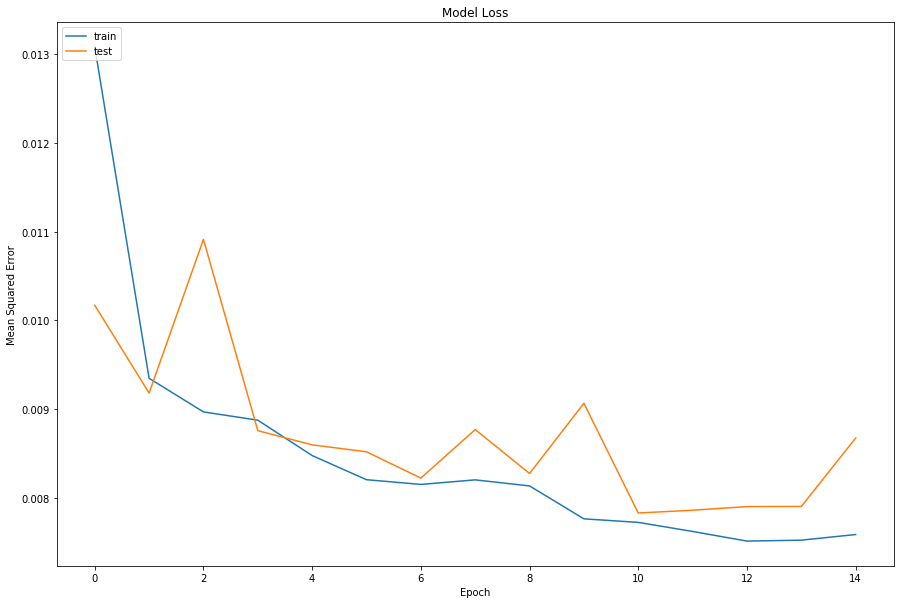

In [342]:
#from numpy.random import seed
#seed(1)
# Filter out the wanted columns
x = housing_df_feature[feature_list]
y = housing_df_feature['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

# Scale the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(y_train.values.reshape(len(y_train),1))
y_test = scaler.transform(y_test.values.reshape(len(y_test),1))

# define the neural network structure
model = Sequential()
model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])

# train the model
history = model.fit(x_train, y_train, epochs=15, verbose=0, validation_data=(x_test, y_test))

# make a prediction
y_pred = model.predict(x_test)[:,0]
# show the inputs and predicted outputs

y_pred = scaler.inverse_transform(y_pred.reshape(len(y_pred),1))
y_test = scaler.inverse_transform(y_test)

# Evaluate Results
mean_error = (pd.Series(y_pred[:,0]) - y_test[:,0]).abs().mean()
print('Mean Absolute Test Error: ' + str(mean_error))

# Plot error over training time
plt.figure(figsize=(15,10))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Assignment 6: Try different number of training epochs
-  What happens with the loss for a higher amount of training epochs(time)?

### Assignment 7: Try different sizes of the network
-  What are the results when more layers are added? 
-  What are the results when more neurons in each layer is added.
-  Why is there a difference between train and test data in absolute error? 

### Assignment 8: Add more features
-  Which columns could be useful for providing more predictive power?
-  Include those features in the model and run the training again.

### Questions: Compare models
-  Which of the different models performed best? Why?
-  Why does a well tuned neural network perform better than a linear regression model?
-  What could be done to increase predictive power?
-  Which additional data do you think would make a large differce in predictive power?
-  What was the lowest mean square error you got?